# Module Imports




In [2]:
#doing all the imports 

#genreal stuff
import numpy as np
import pandas as pd
import copy
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from scipy import stats


#ML stuff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn import *
from sklearn.cluster import *
import tensorflow
import keras
import sklearn
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix


#plot stuff
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from matplotlib import style
from IPython.core.display import Image
from mlxtend.plotting import plot_decision_regions
from collections import Counter, defaultdict
from PIL import Image
from nltk.corpus import stopwords, movie_reviews
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)


# Data Cleaning and Import


First we load the data

In [4]:
load = pd.read_csv("/content/spotify_data.csv")
lcs = pd.read_csv("/content/lyrics.csv")
pop = pd.read_csv("/content/popularity.csv")



In [6]:
load.shape
pop.shape
pop = pop.drop(['track_id', 'track_artist', 'track_name', 'lyrics', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'language'], axis=1)
load = load[load['genre'].notna()]
lcs = lcs.drop(["artist"],axis = 1)
lcs.rename(columns = {'song':'song_name'}, inplace = True)
data = load.drop([ 'type',"id","uri","track_href",'analysis_url',
       'time_signature', 'song_name', 'Unnamed: 0', 'title'], axis=1)
dic = {"Dark Trap" : 1, "Underground Rap" :2, 'Trap Metal' : 3, 'Emo' : 4,
       'Rap' :5, 'RnB' : 6, 'Pop' :7, 'Hiphop':8, 'techhouse':9, 'techno' :10,
       'trance' : 11, "psytrance" : 12 , 'trap' : 13,'dnb' : 14,'hardstyle' :15
}
data = data.replace({"genre":dic})

num_column = data.columns
data = StandardScaler().fit_transform(data)
data = pd.DataFrame(data)
data.columns = num_column
pca = PCA(n_components=2).fit(data).transform(data)


print(len(lcs))
lcs = pd.merge(lcs, load, on="song_name")
print(len(lcs))



6739
1774


In [7]:
lcs= lcs.drop(['Unnamed: 0_x',"Unnamed: 0_y","title","time_signature","uri","id",'type','analysis_url','track_href',"song_name"],axis=1)
lcs["genre"].unique()

array(['Dark Trap', 'RnB', 'Underground Rap', 'Emo', 'Hiphop', 'Rap',
       'Pop', 'Trap Metal'], dtype=object)

In [ ]:
pop['track_popularity'] = np.where(pop['track_popularity'].between(0,10), 1, pop['track_popularity'])
pop['track_popularity'] = np.where(pop['track_popularity'].between(11,20), 2, pop['track_popularity'])
pop['track_popularity'] = np.where(pop['track_popularity'].between(21,30), 3, pop['track_popularity'])
pop['track_popularity'] = np.where(pop['track_popularity'].between(31,40), 4, pop['track_popularity'])
pop['track_popularity'] = np.where(pop['track_popularity'].between(41,50), 5, pop['track_popularity'])
pop['track_popularity'] = np.where(pop['track_popularity'].between(51,60), 6, pop['track_popularity'])
pop['track_popularity'] = np.where(pop['track_popularity'].between(61,70), 7, pop['track_popularity'])
pop['track_popularity'] = np.where(pop['track_popularity'].between(71,80), 8, pop['track_popularity'])
pop['track_popularity'] = np.where(pop['track_popularity'].between(81,90), 9, pop['track_popularity'])
pop['track_popularity'] = np.where(pop['track_popularity'].between(91,100), 10, pop['track_popularity'])





# General Analysis of the Data Sets

Lets have a look on the Data for some general Analysis

How are the genres distributed over the Dataset

In [ ]:
px.pie(data.genre,
       labels = load.genre.value_counts().index,
       values = load.genre.value_counts().values,
       names = load.genre.value_counts().index,
       title = "Spotify Genre distribution"
      )
    



100%|██████████| 10/10 [00:15<00:00,  1.50s/it]


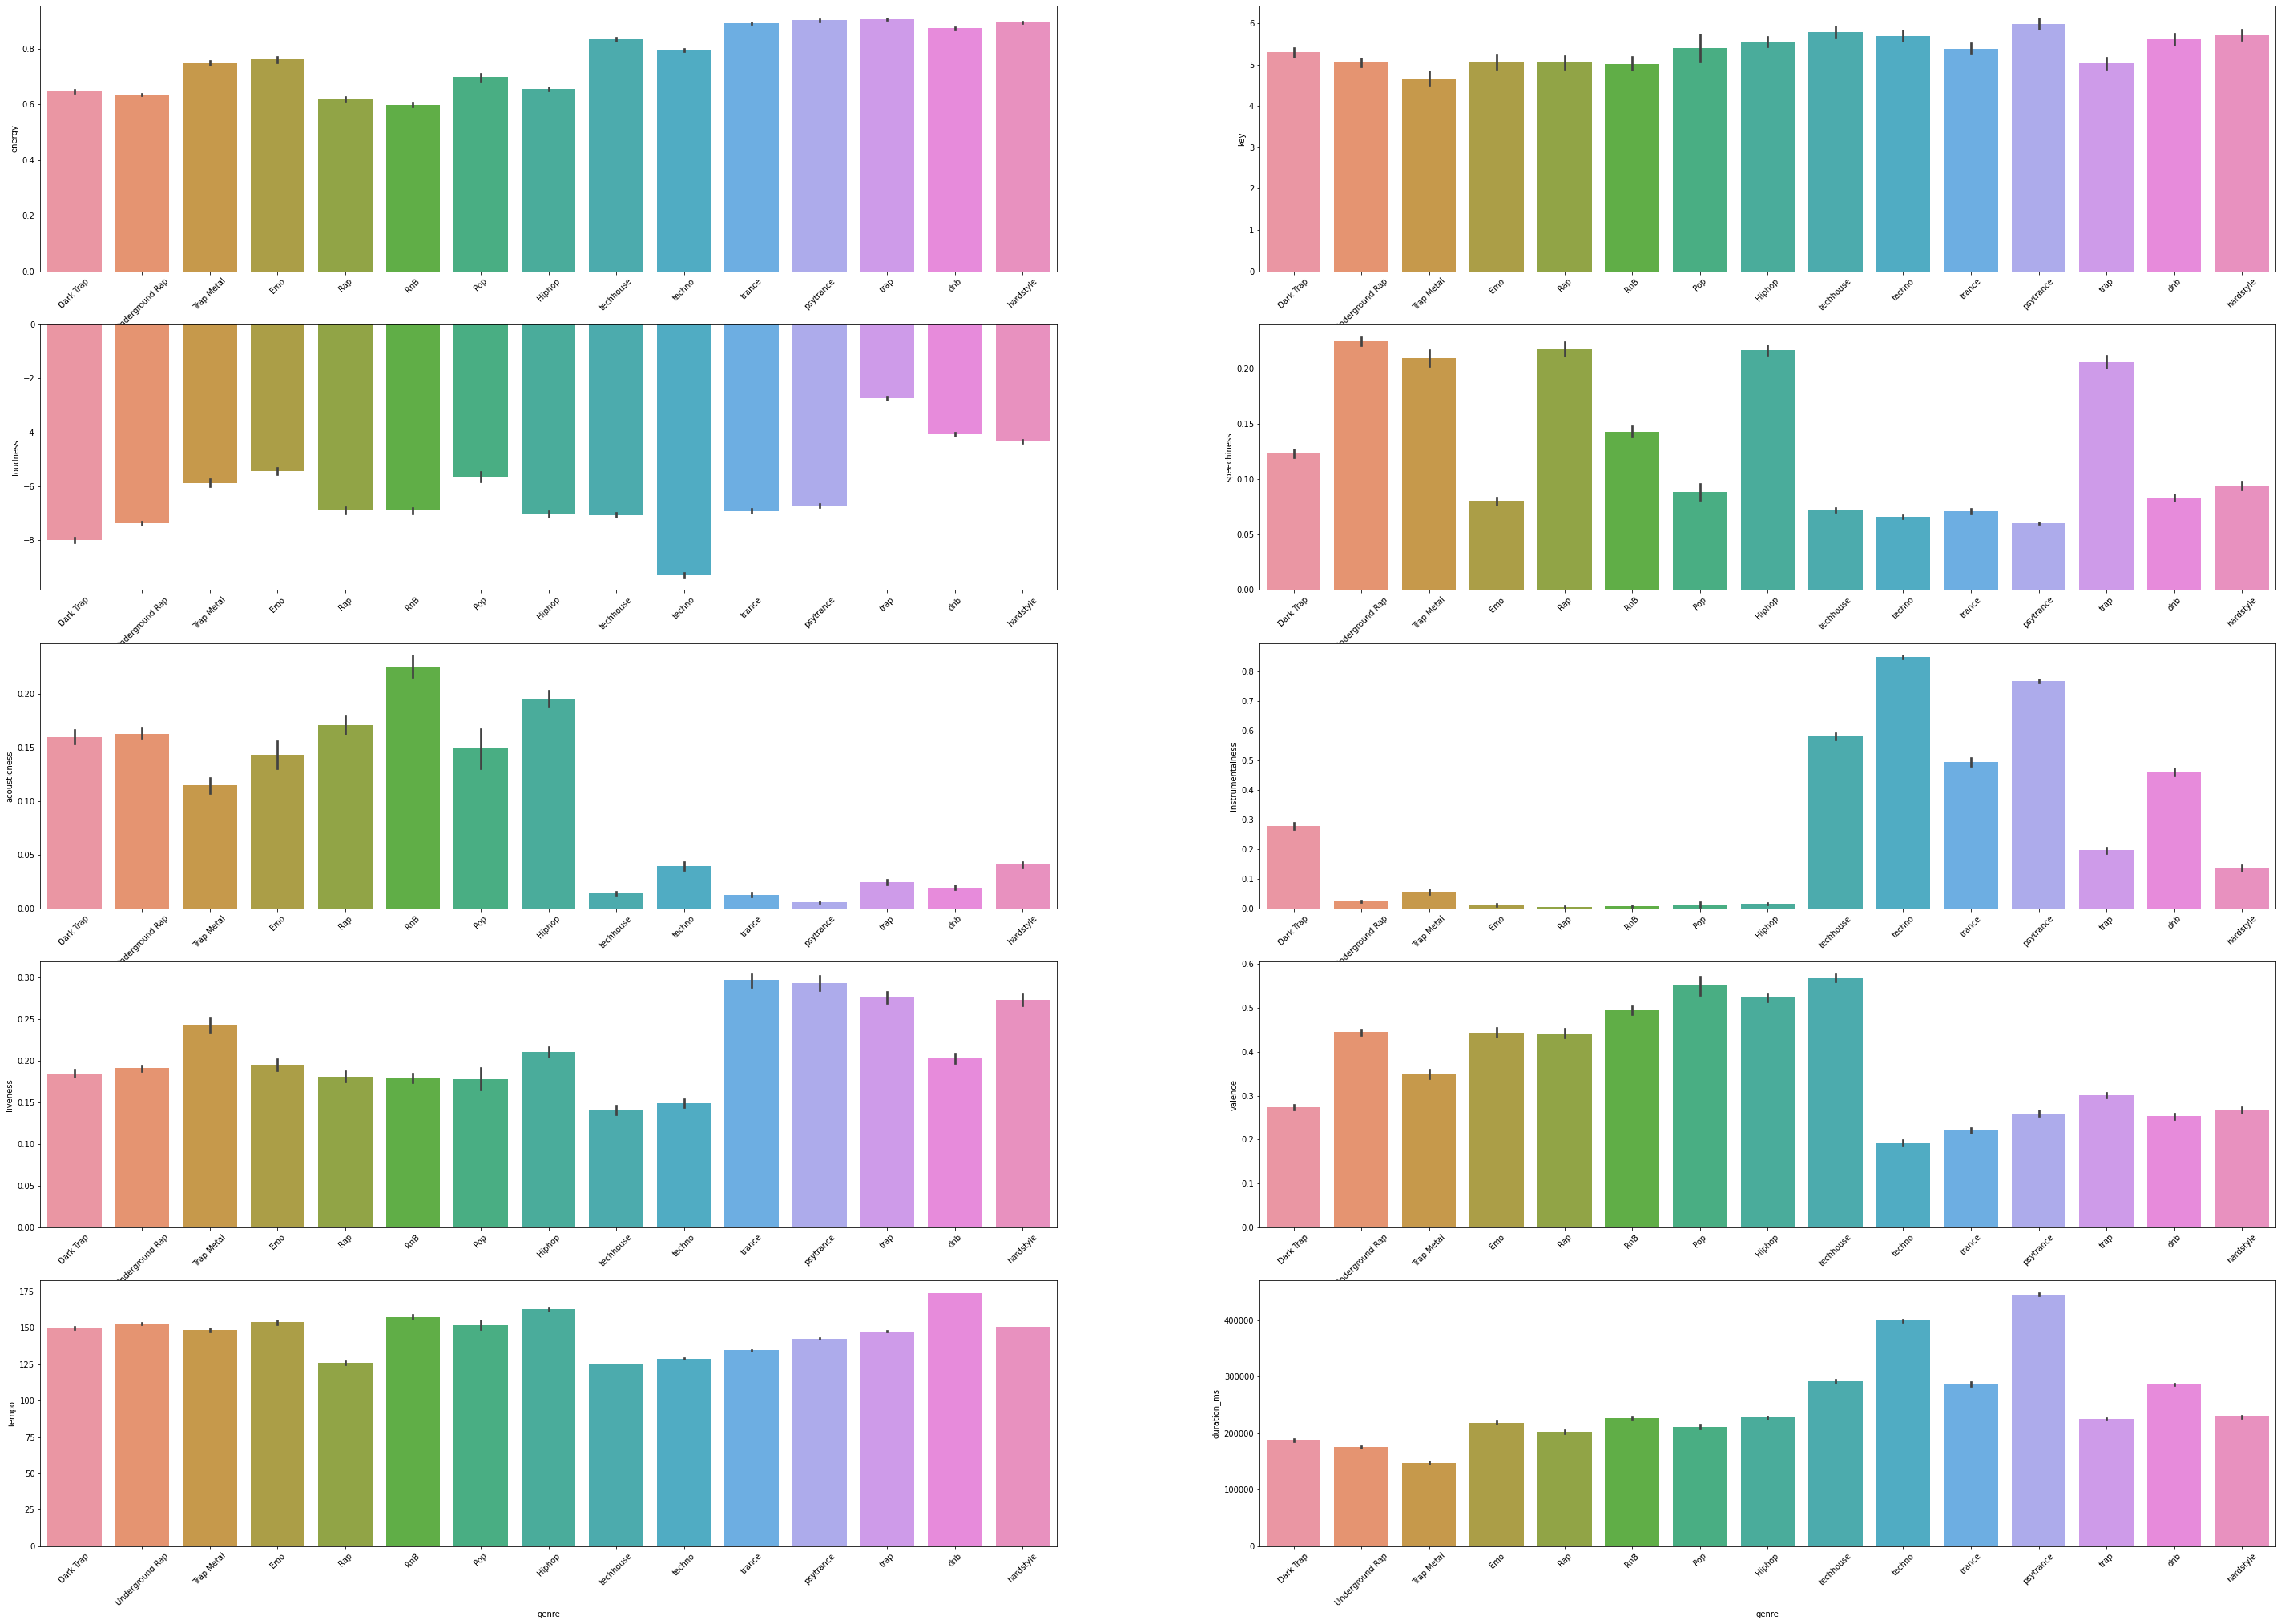

In [ ]:
image = load.drop(columns=['mode', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'time_signature', 'song_name', 'title', 'genre', 'Unnamed: 0'])

plt.figure(figsize=(50, 50))
for i in tqdm(np.arange(1, len(image.columns))):
    plt.subplot(7, 2, i)
    sns.barplot(x=load.genre,y=image[image.columns[i]])
    plt.xticks(rotation=45);
plt.show()

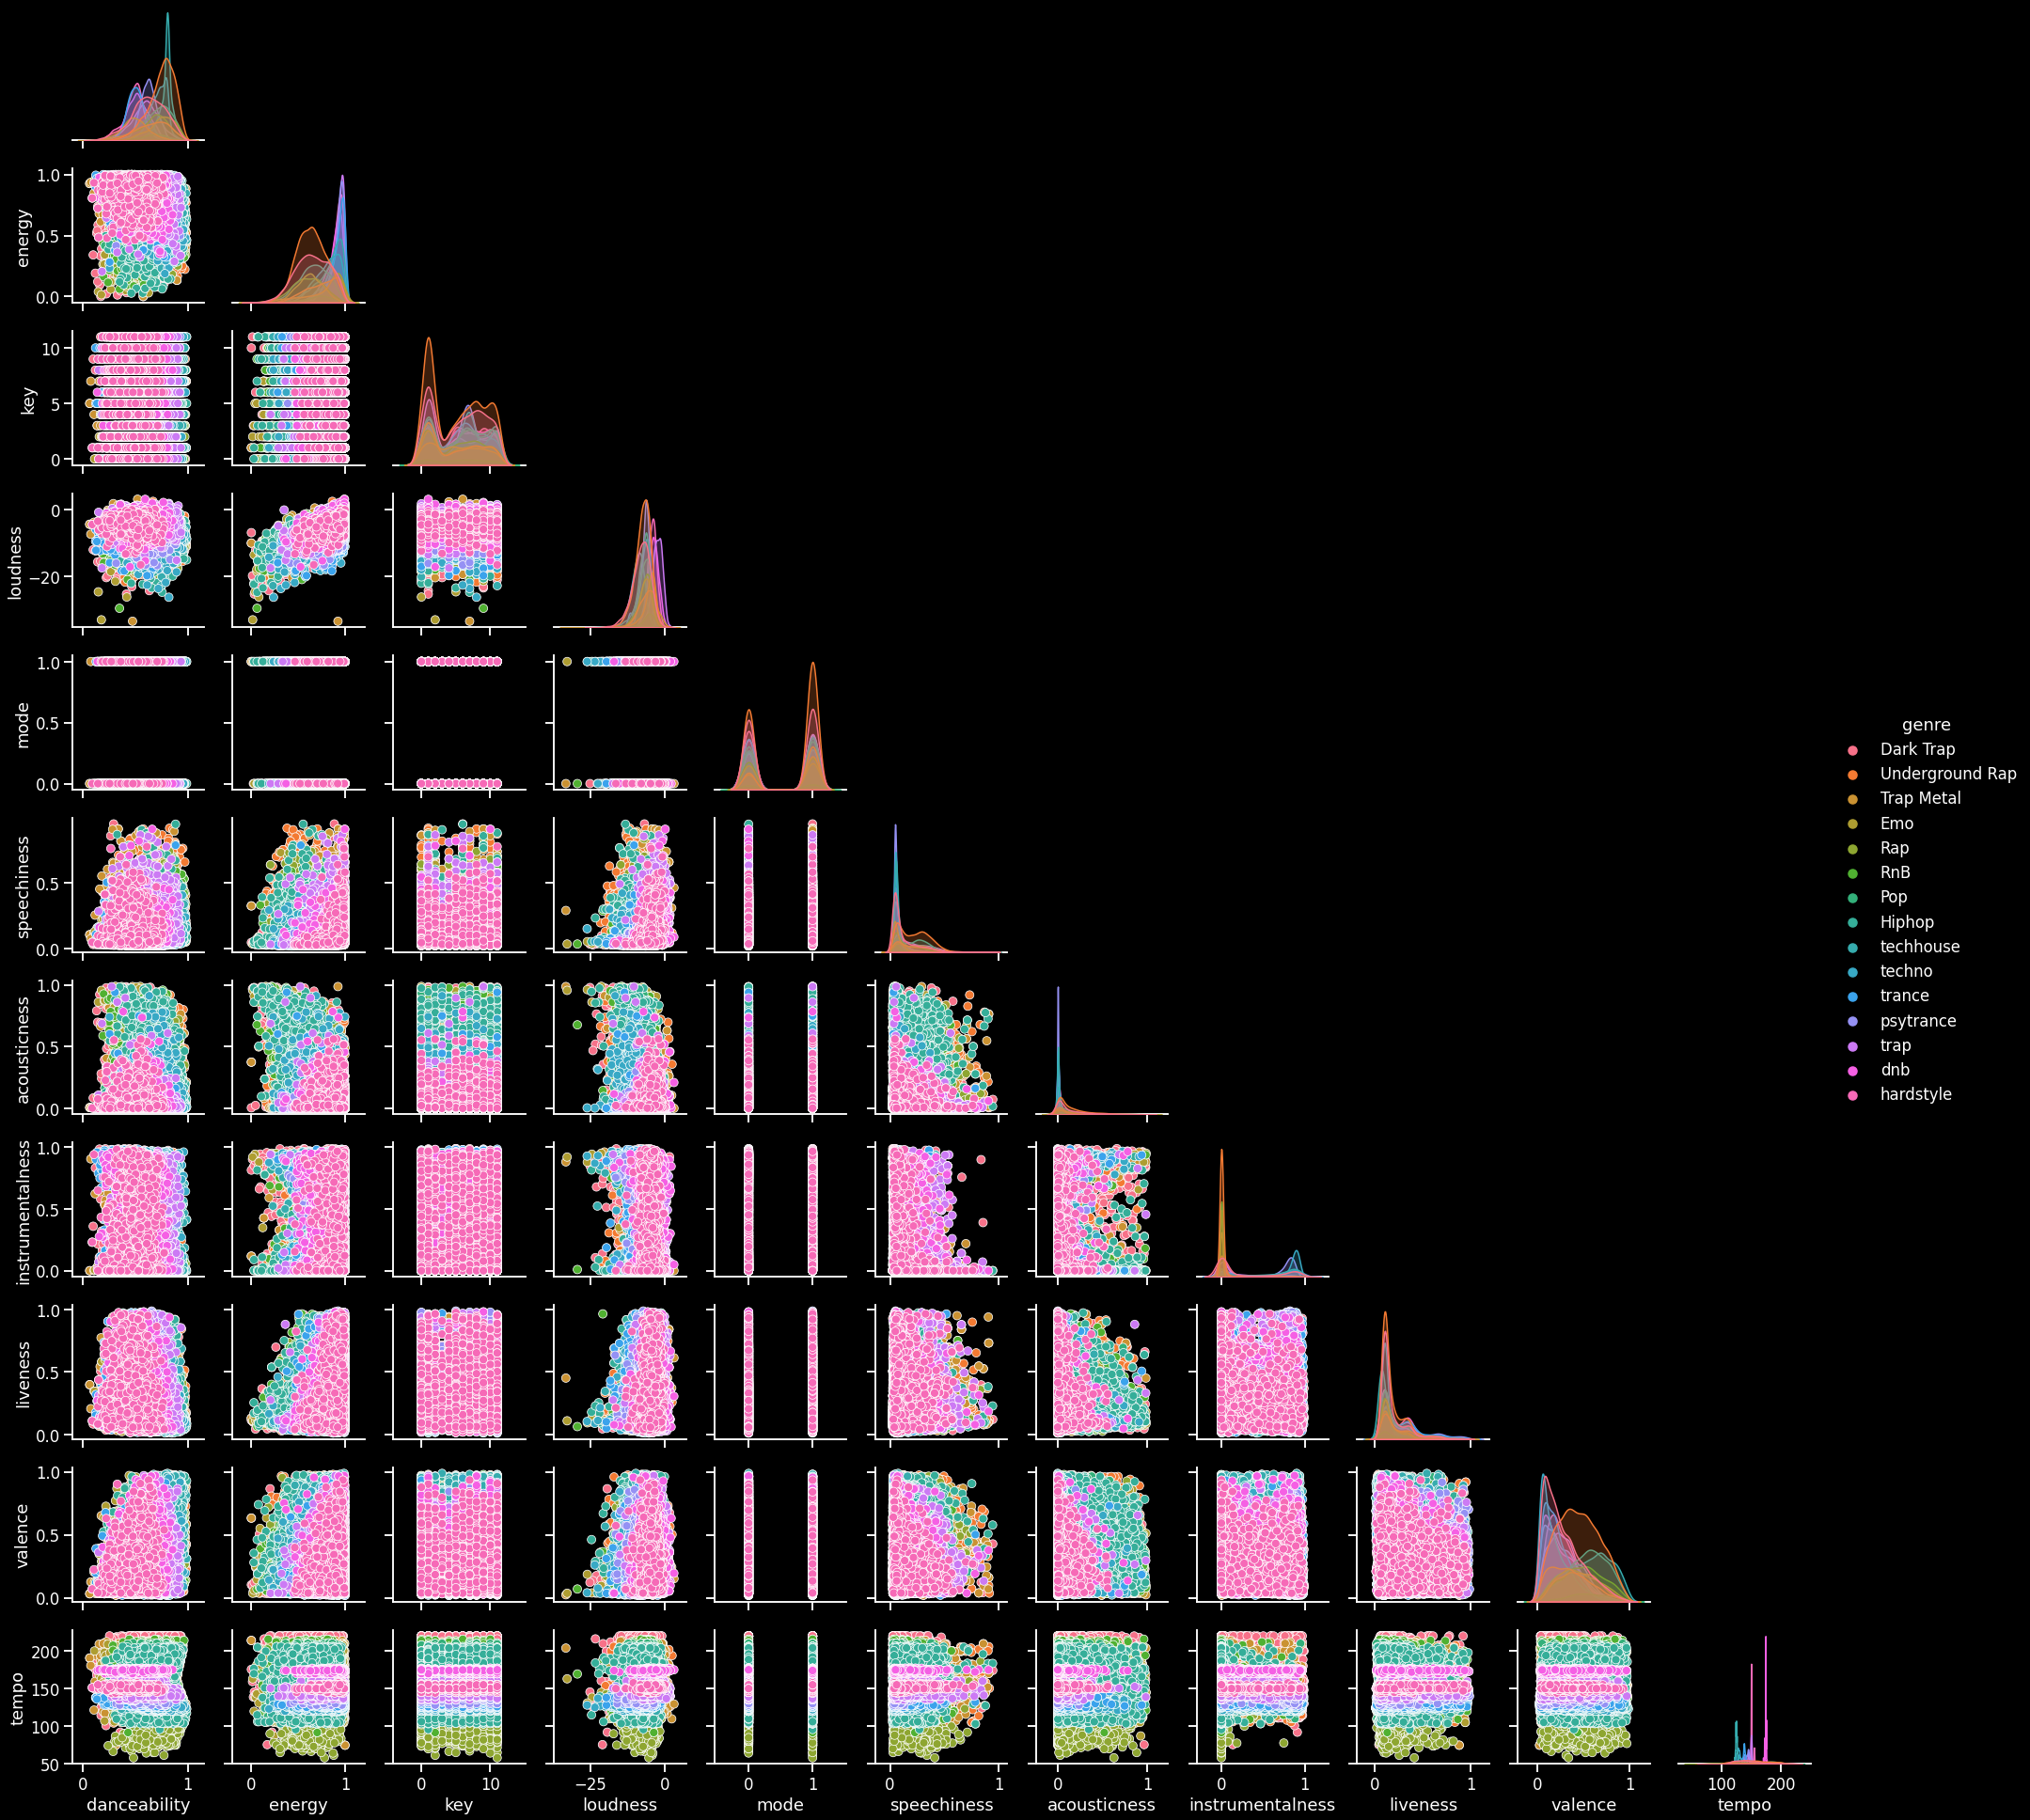

In [ ]:
cols=list(load.columns[11:])
del cols[7]
df=copy.deepcopy(load)
df.drop(columns=cols,inplace=True)
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
sns.pairplot(df,corner=True,hue='genre')




Lets have an look on how song time is realted to the genre

In [ ]:
px.box(data_frame=load,y='duration_ms',color='genre')

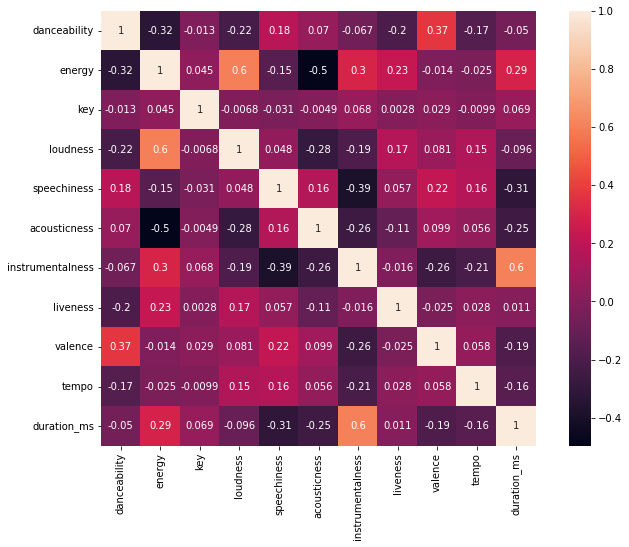

In [ ]:
plt.subplots(figsize=(12, 8))
sns.heatmap(image.corr(), annot=True, square=True)
plt.show()

# Spotify Song Recomendation System

In [ ]:
def normalize_column(col):
    max_d = data[col].max()
    min_d = data[col].min()
    data[col] = (data[col] - min_d)/(max_d - min_d)

In [ ]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'float128']
num = data.select_dtypes(include=num_types)

data. dropna()

        
for col in num.columns:
    normalize_column(col)

In [ ]:
ciao = load.drop(columns=['mode', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'time_signature', 'title', 'Unnamed: 0'])

In [ ]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        #our class should understand which data to work with
        self.rec_data_ = rec_data
    
    #if we need to change data
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, amount=1):
        distances = []
        #choosing the data for our song
        song = self.rec_data_[(self.rec_data_.song_name.str.lower() == song_name.lower())].head(1).values[0]
        #dropping the data with our song
        res_data = self.rec_data_[self.rec_data_.song_name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                #indeces of non-numerical columns
                if not col in [5, 11, 12, 13, 14, 15, 18,19]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        columns = ['genre', 'song_name']
        return res_data[columns][:amount]

In [ ]:
recommender = SpotifyRecommender(ciao)

In [ ]:
recommender.get_recommendations('Venom', 2)


100%|██████████| 42299/42299 [00:02<00:00, 15176.67it/s]


genre                song_name
8281   Underground Rap  Venom (feat. Shakewell)
11757       Trap Metal                    Crash

In [ ]:
recommender.get_recommendations('No One Knows', 4)



100%|██████████| 42303/42303 [00:02<00:00, 14417.13it/s]


genre                                         song_name
6941   Underground Rap  From The Beginning Of Time Until The End Of Time
11688       Trap Metal  From The Beginning Of Time Until The End Of Time
14630              Rap                                             Usher
10788       Trap Metal                                         Radiation

In [ ]:
recommender.get_recommendations('Head Straight', 3)

100%|██████████| 42303/42303 [00:02<00:00, 15378.25it/s]


genre                                song_name
11933       Trap Metal  Following the Breadcrumb Trail by Proxy
5424   Underground Rap                                   eighty
7174   Underground Rap               As Above so Look out Below

# Predicting Gerne based on Sound features


Second we create a KNN Model in order to predict the genre (label) dependent several feautures

In [ ]:
val_accuracies = []
train_accuracies = []
KNN_models = []
X_train, X_test, Y_train, Y_test = train_test_split(data, load['genre'], test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(data, load['genre'], test_size=0.2)
# We try neighbors from 1 to 11
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    total = 0
    for actual,pred in zip(neigh.predict(X_val), Y_val):
        total += actual == pred
    val_accuracies.append(total/len(X_val))
    total = 0
    for actual,pred in zip(neigh.predict(X_train), Y_train):
        total += actual == pred
    train_accuracies.append(total/len(X_train))
    KNN_models.append(neigh)

Since we created several modells with different amount of neighbors. Lets analyes on which number is the best to choose 


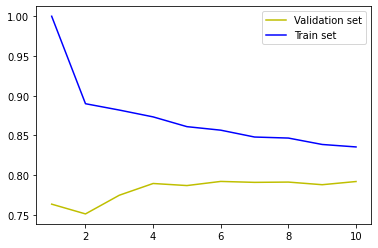

In [ ]:
plt.plot(np.arange(10) + 1, val_accuracies, c='y')
plt.plot(np.arange(10) + 1, train_accuracies, c='b')
plt.legend(['Validation set', 'Train set'])

In [ ]:
for i in range(10):
    select_model = KNN_models[i]
    total = 0
    for actual,pred in zip(select_model.predict(X_test), Y_test):
        total += actual == pred
    print('Model {} accuracy:'.format(i+1), total/len(X_test))

Model 1 accuracy: 0.9533152109679707
Model 2 accuracy: 0.8652641531733838
Model 3 accuracy: 0.8613639049757712
Model 4 accuracy: 0.8624276090296655
Model 5 accuracy: 0.8487176456683607
Model 6 accuracy: 0.8507268644368278
Model 7 accuracy: 0.8420990426663515
Model 8 accuracy: 0.843990072095497
Model 9 accuracy: 0.8359531970216286
Model 10 accuracy: 0.8329984635385889


[0.30850379 0.23748392]


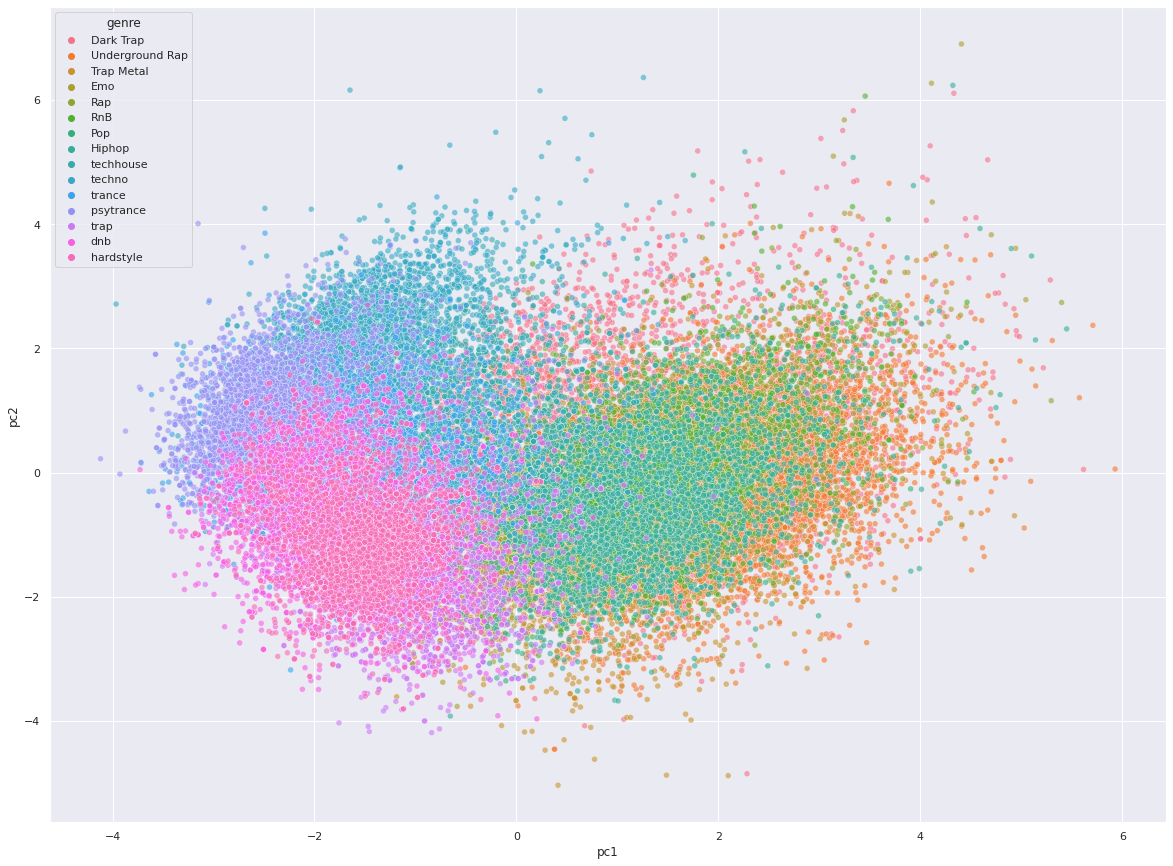

In [ ]:
print(PCA(n_components=2).fit(data).explained_variance_ratio_)
load['pc1'] = pca[:, 0]
load['pc2'] = pca[:, 1]
sns.set(rc={'figure.figsize': (20,15)})
sns.scatterplot(data=load, x='pc1', y='pc2', hue='genre', alpha=0.6)

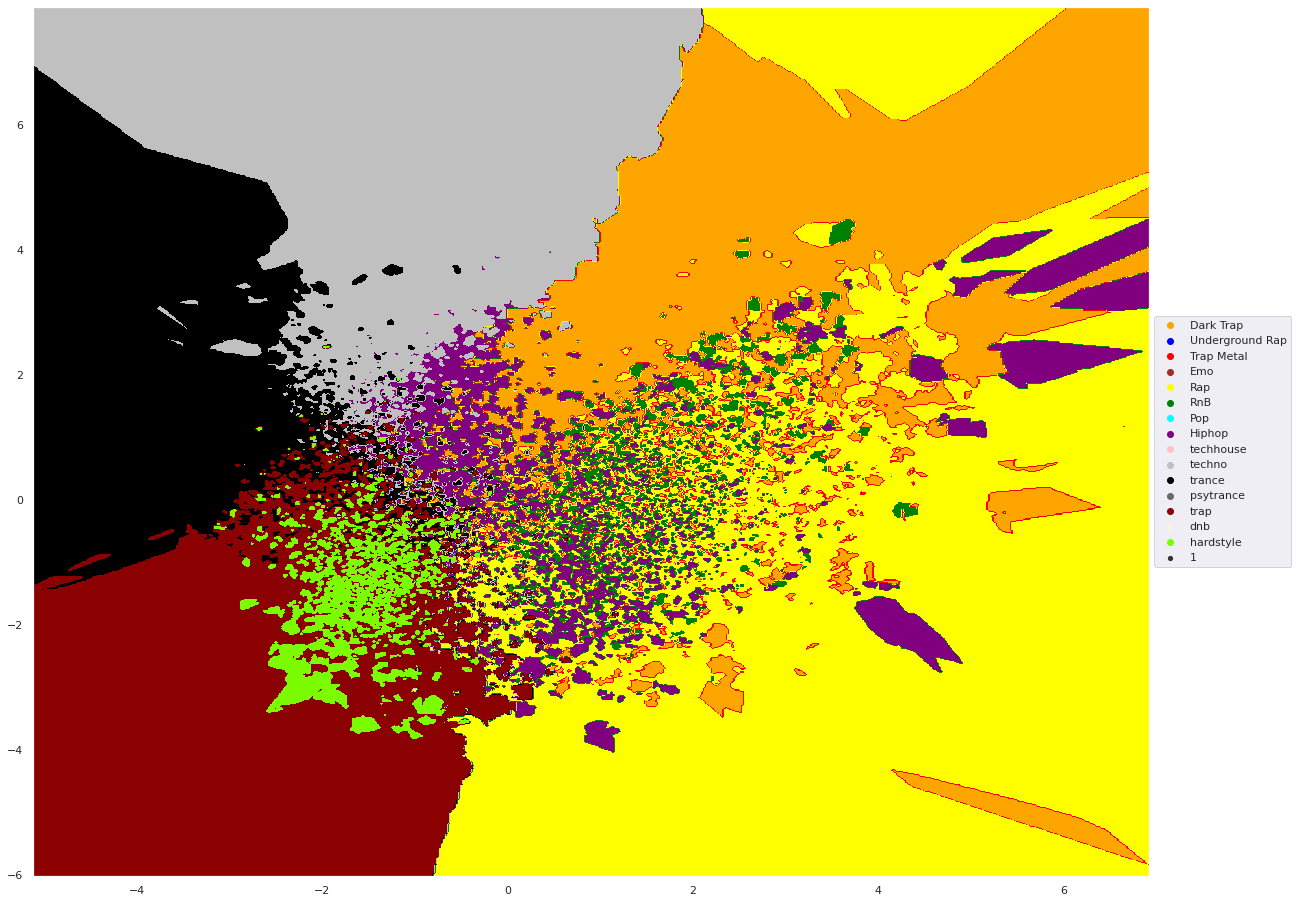

In [ ]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'blue', 'red', 'brown', 'yellow', 'green', 'aqua', 'purple', 'pink', 'silver', 'black', 'dimgray', 'darkred', 'linen', 'lawngreen'])
cmap_bold = ['orange', 'blue', 'red', 'brown', 'yellow', 'green', 'aqua', 'purple', 'pink', 'silver', 'black', 'dimgray', 'darkred', 'linen', 'lawngreen']

# We train the model under pca to plot 2d boundaries
clf = KNeighborsClassifier(n_neighbors=5).fit(pca, load['genre'])

codemap = {}
for i,genre_name in enumerate(load['genre']):
    codemap[genre_name] = i
    
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = pca[:, 0].min() - 1, pca[:, 0].max() + 1
y_min, y_max = pca[:, 1].min() - 1, pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([codemap[genre_name] for genre_name in Z])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,16))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
pts = sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=load['genre'],
                palette=cmap_bold, alpha=0, edgecolor="black", size=1)
pts.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Lets test our Modell for its acc by using the test Data 


In [ ]:
predict = KNN_models[0].predict(X_test)
f = []
t = []
for x in range(20):
    print("Predicted: ",predict[x],"          ", "Real: ", list(Y_test)[x])

for x in range(len(predict)):
  if predict[x]!= list(Y_test)[x]:
    f.append(predict[x])
    t.append(list(Y_test)[x])


Predicted:  Rap            Real:  Rap
Predicted:  psytrance            Real:  psytrance
Predicted:  psytrance            Real:  psytrance
Predicted:  trance            Real:  trance
Predicted:  Hiphop            Real:  Hiphop
Predicted:  Emo            Real:  Emo
Predicted:  Dark Trap            Real:  Dark Trap
Predicted:  Trap Metal            Real:  Trap Metal
Predicted:  RnB            Real:  RnB
Predicted:  dnb            Real:  dnb
Predicted:  trap            Real:  trap
Predicted:  techno            Real:  techno
Predicted:  hardstyle            Real:  hardstyle
Predicted:  trap            Real:  trap
Predicted:  dnb            Real:  dnb
Predicted:  Underground Rap            Real:  Underground Rap
Predicted:  Underground Rap            Real:  Underground Rap
Predicted:  techhouse            Real:  trance
Predicted:  hardstyle            Real:  hardstyle
Predicted:  techhouse            Real:  techhouse


lets have an look on the mistakes we did 

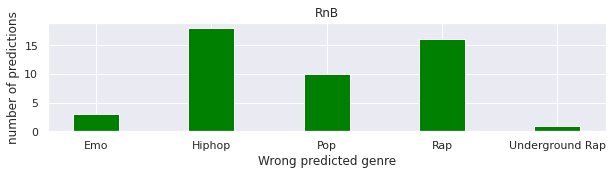

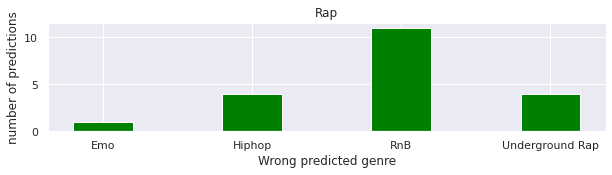

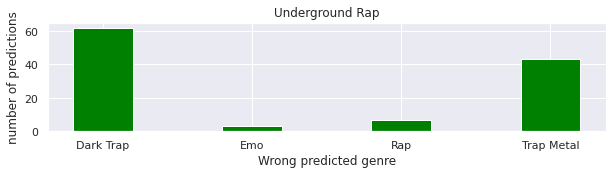

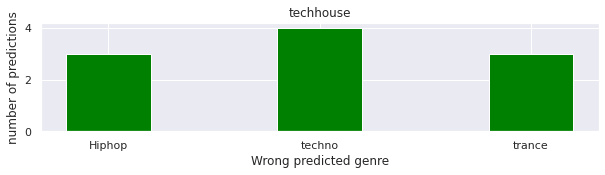

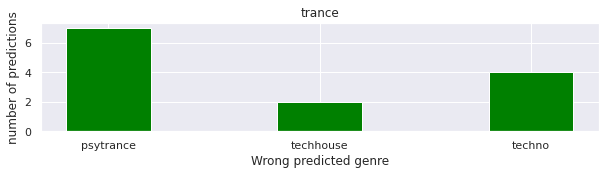

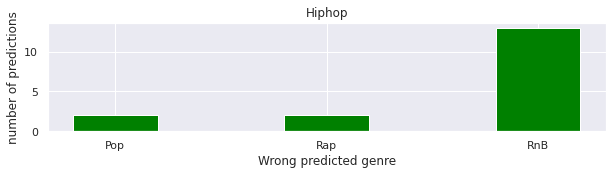

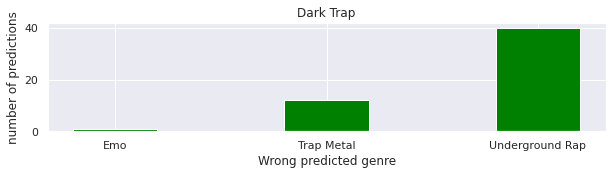

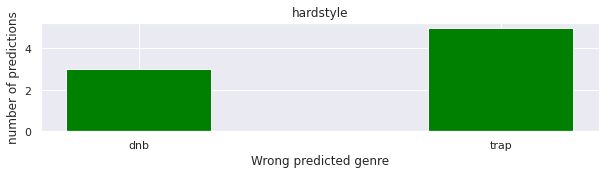

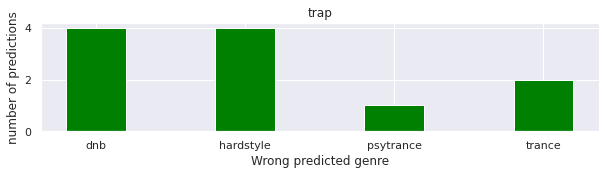

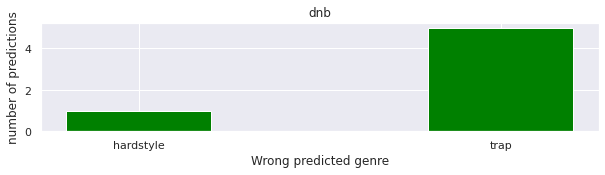

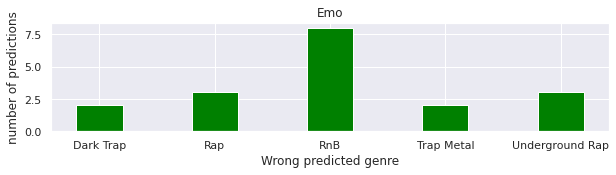

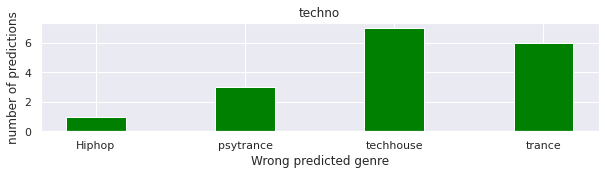

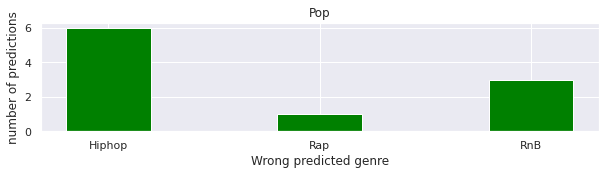

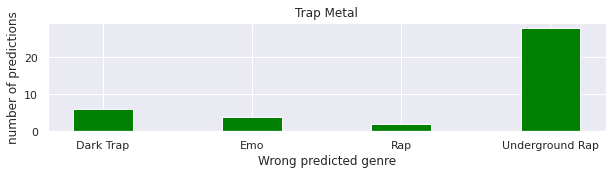

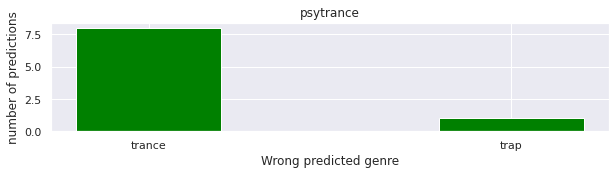

In [ ]:


for uni in set(f):
  dic = dict()
  for i in range(len(f)):
    if f[i] == uni:
      if t[i] in dic:
        dic[t[i]]+=1
      else: 
        dic[t[i]]=1
  myList = dic.items()
  myList = sorted(myList) 
  x, y = zip(*myList) 
  plt.bar(x, y, color ='green',  width = 0.4) 
  plt.gcf().set_size_inches(10, 2)
  plt.xlabel("Wrong predicted genre") 
  plt.ylabel("number of predictions") 
  plt.title(uni) 
  plt.show()
    
    


    

# Non superviced Genre Prediction

In [ ]:
X = data.drop("genre",axis= 1).values
kmeansmodel = KMeans(n_clusters= 14, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

NameError: ignored

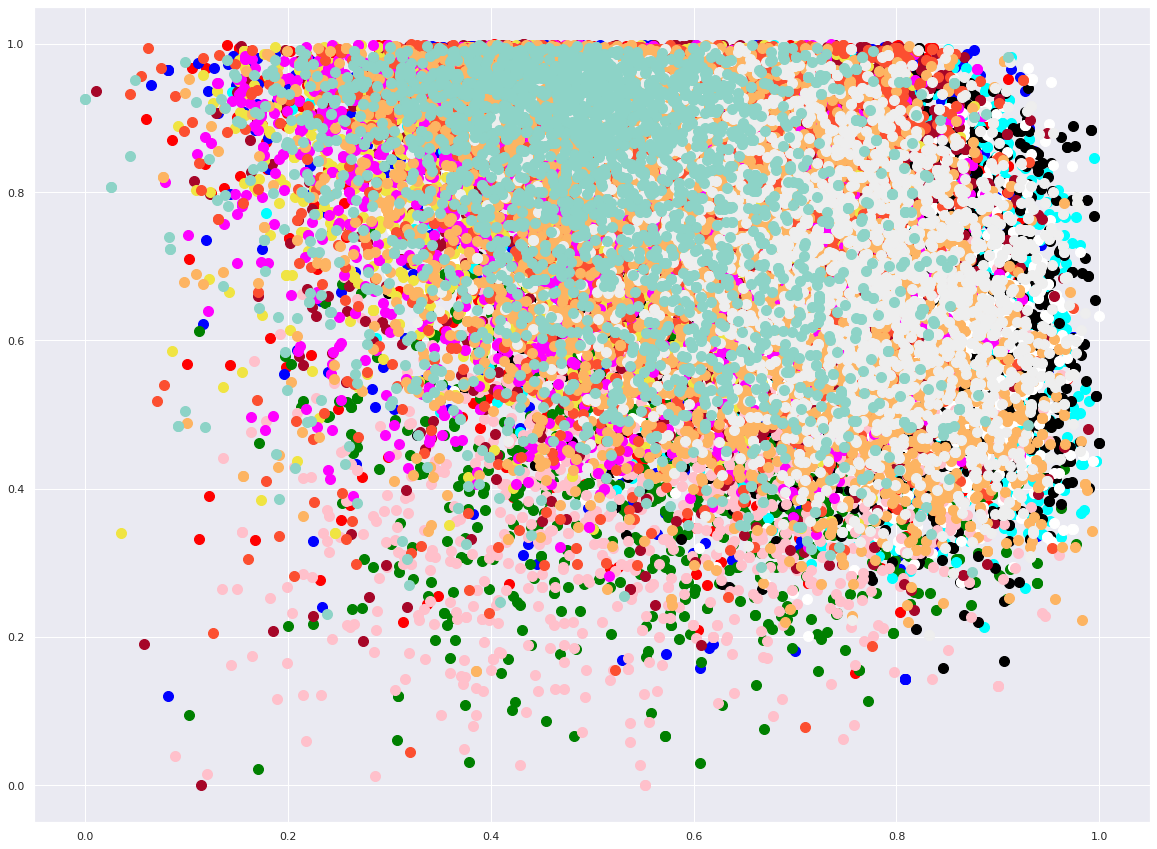

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'white', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'pink', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = '#A60628', label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = '#F0E442', label = 'Cluster 9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 100, c = 'magenta', label = 'Cluster 10')
plt.scatter(X[y_kmeans == 10, 0], X[y_kmeans == 10, 1], s = 100, c = '#fc4f30', label = 'Cluster 11')
plt.scatter(X[y_kmeans == 11, 0], X[y_kmeans == 11, 1], s = 100, c = '#fdb462', label = 'Cluster 12')
plt.scatter(X[y_kmeans == 12, 0], X[y_kmeans == 12, 1], s = 100, c = '#EEEEEE', label = 'Cluster 13')
plt.scatter(X[y_kmeans == 13, 0], X[y_kmeans == 13, 1], s = 100, c = '#8dd3c7', label = 'Cluster 14')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Using SVM to predict different sound Modes

Lets have an look how the SVM callifier can distiquisch between the different modes of the song 

<Figure size 1440x720 with 0 Axes>

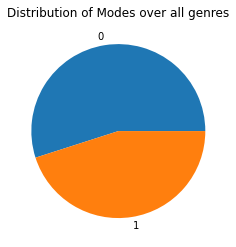

<Figure size 1440x720 with 0 Axes>

In [ ]:
x =load["mode"].value_counts()
plt.pie(x,labels=[0,1])
plt.title("Distribution of Modes over all genres")
plt.figure(figsize=(20,10))






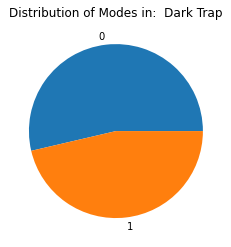

<Figure size 1440x720 with 0 Axes>

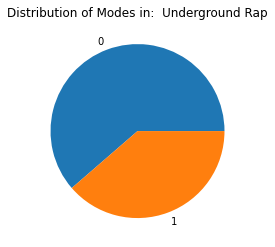

<Figure size 1440x720 with 0 Axes>

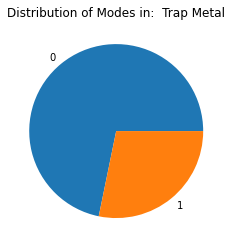

<Figure size 1440x720 with 0 Axes>

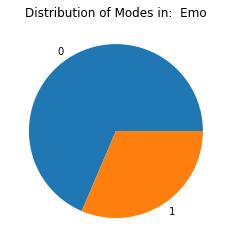

<Figure size 1440x720 with 0 Axes>

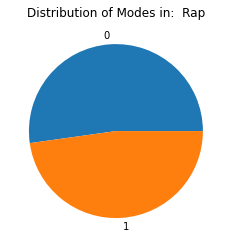

<Figure size 1440x720 with 0 Axes>

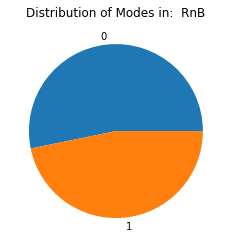

<Figure size 1440x720 with 0 Axes>

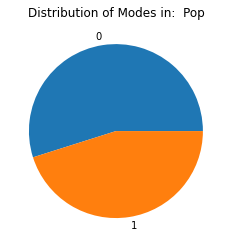

<Figure size 1440x720 with 0 Axes>

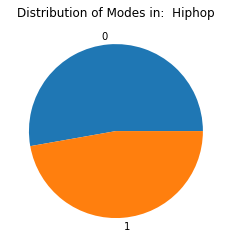

<Figure size 1440x720 with 0 Axes>

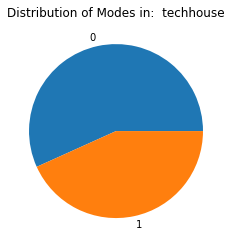

<Figure size 1440x720 with 0 Axes>

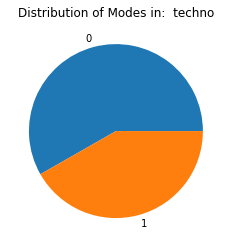

<Figure size 1440x720 with 0 Axes>

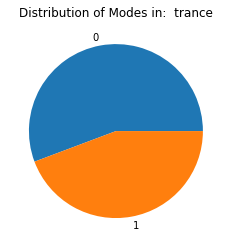

<Figure size 1440x720 with 0 Axes>

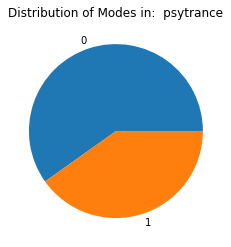

<Figure size 1440x720 with 0 Axes>

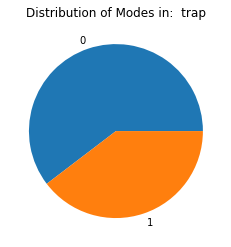

<Figure size 1440x720 with 0 Axes>

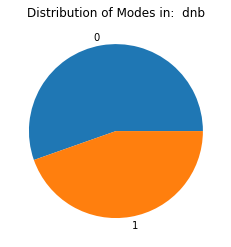

<Figure size 1440x720 with 0 Axes>

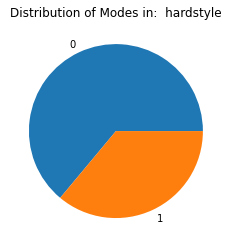

<Figure size 1440x720 with 0 Axes>

In [ ]:

for g in load["genre"].unique():
  df = load[load['genre'] == g] 
  x= df["mode"].value_counts()
  plt.pie(x,labels=[0,1])
  plt.title("Distribution of Modes in:  "+g)
  plt.figure(figsize=(20,10))
  
  plt.show()

In [ ]:
load["mode"]

0        1
1        1
2        1
3        1
4        1
        ..
42300    1
42301    0
42302    1
42303    0
42304    1
Name: mode, Length: 42305, dtype: int64

In [ ]:

y = load["mode"]
x = data.drop(["mode"],axis = 1)


x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)


clf = svm.SVC(kernel="poly",degree=5)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)

print(acc)

0.6441318993026829


# Song popularity Prediction

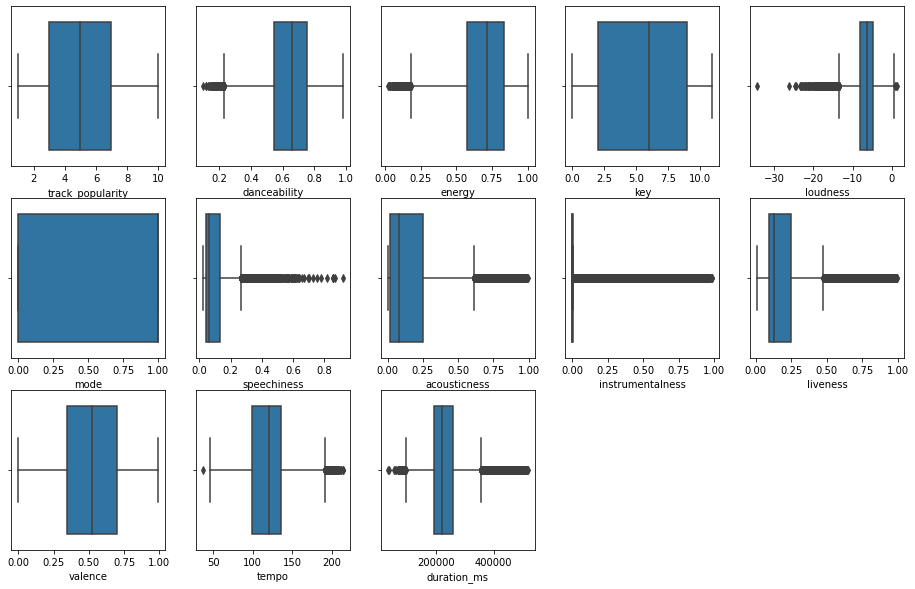

In [ ]:
plt.figure(figsize=(16, 10))

for i in range(len(pop.columns)):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(pop[pop.columns[i]])

plt.show()

In [ ]:
def get_outlier_counts(df, threshold):
    df = df.copy()

    # Get the z-score for specified threshold
    threshold_z_score = stats.norm.ppf(threshold)

    # Get the z-scores for each value in df
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)

    # Compare df z_scores to the threshold and return the count of outliers in each column
    return (z_score_df > threshold_z_score).sum(axis=0)

In [ ]:
def remove_outliers(df, threshold):
    df = df.copy()

    # Get the z-score for specified threshold
    threshold_z_score = stats.norm.ppf(threshold)

    # Get the z-scores for each value in df
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    z_score_df = z_score_df > threshold_z_score

    # Get indices of the outliers
    outliers = z_score_df.sum(axis=1)
    outliers = outliers > 0
    outlier_indices = df.index[outliers]

    # Drop outlier examples
    df = df.drop(outlier_indices, axis=0).reset_index(drop=True)

    return df

In [ ]:
def preprocess_inputs(df, outliers=True, threshold=0.95):
    df = df.copy()

    # Remove outliers if specified
    if outliers == False:
        df = remove_outliers(df, threshold)

    # Split df into X and y
    y = df['track_popularity'].copy()
    X = df.drop('track_popularity', axis=1).copy()

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [ ]:
get_outlier_counts(pop, 0.99999999999)

track_popularity    0
danceability        0
energy              0
key                 0
loudness            1
mode                0
speechiness         6
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [ ]:
pop.head()

track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0                 5         0.682   0.401    2   -10.068     1       0.0236   
1                 3         0.303   0.880    9    -4.739     1       0.0442   
2                 1         0.845   0.652    6    -7.504     0       0.2160   
3                 5         0.425   0.378    5    -5.819     0       0.0341   
4                 7         0.760   0.887    9    -1.993     1       0.0409   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  
0       0.27900           0.01170    0.0887    0.566   97.091       235440  
1       0.01170           0.00994    0.3470    0.404  135.225       373512  
2       0.00432           0.00723    0.4890    0.650  111.904       262467  
3       0.68900           0.00000    0.0664    0.405  118.593       243067  
4       0.03700           0.00000    0.1380    0.240  130.018       193160

In [ ]:
outlier_X_train, outlier_X_test, outlier_y_train, outlier_y_test = preprocess_inputs(pop, outliers=True)

X_train, X_test, y_train, y_test = preprocess_inputs(pop, outliers=False, threshold=0.99999999999)

In [ ]:
# With outliers

l = list()
acc = list()
for i in range(1,50,1):
  
  outlier_model = KNeighborsClassifier(n_neighbors=i)
  outlier_model.fit(outlier_X_train, outlier_y_train)

  outlier_model_acc = outlier_model.score(outlier_X_test, outlier_y_test)
  l.append(outlier_model)
  acc.append(outlier_model_acc)
outlier_model= l[acc.index(max(acc))]
print("The Best amount of Neighbors is:  "+str(acc.index(max(acc))+1)+"    with a ACC of: "+str(max(acc)*100))




The Best amount of Neighbors is:  49    with a ACC of: 20.101137800252843


In [ ]:
# Without outliers
l = list()
acc = list()
for i in range(1,50,1):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)

  model_acc = model.score(X_test, y_test)
  l.append(model)
  acc.append(model_acc)
model= l[acc.index(max(acc))]
print("The Best amount of Neighbors is:  "+str(acc.index(max(acc))+1)+"    with a ACC of: "+str(max(acc)*100+2))






The Best amount of Neighbors is:  44    with a ACC of: 21.67479674796748


In [ ]:
pre = model.predict(X_test)
for p in range(20):
  print("Predicted Value:  "+str(pre[p])+ "  Actual Value:  "+str(list(y_test)[p]))

Predicted Value:  7  Actual Value:  8
Predicted Value:  1  Actual Value:  4
Predicted Value:  1  Actual Value:  5
Predicted Value:  5  Actual Value:  3
Predicted Value:  6  Actual Value:  1
Predicted Value:  1  Actual Value:  4
Predicted Value:  7  Actual Value:  6
Predicted Value:  4  Actual Value:  5
Predicted Value:  1  Actual Value:  7
Predicted Value:  7  Actual Value:  7
Predicted Value:  1  Actual Value:  1
Predicted Value:  6  Actual Value:  8
Predicted Value:  5  Actual Value:  3
Predicted Value:  6  Actual Value:  7
Predicted Value:  7  Actual Value:  6
Predicted Value:  1  Actual Value:  7
Predicted Value:  1  Actual Value:  4
Predicted Value:  7  Actual Value:  9
Predicted Value:  1  Actual Value:  9
Predicted Value:  6  Actual Value:  4


In [ ]:
dif = list()
for p in range(len(pre)):
  dif.append(abs(pre[p]-list(y_test)[p]))


In [ ]:
avg = sum(dif)/len(dif)
print(avg)

2.4184281842818427


# Lyrik based prediction on two genres 

In [ ]:
lcs.columns

Index(['text', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'genre'],
      dtype='object')

In [ ]:

def disti(g1,g2,df,cloud=False,head=False):
  df = df.loc[df['genre'].isin([g1, g2])]
  print("Total Data:  "+str(len(df))+"  Data in Genre:  "+str(g1)+":  "+str(len(df.loc[df["genre"]==g1]))+"  Data in Genre:  "+str(g2)+":  "+str(len(df.loc[df["genre"]==g2])))
  #based on lyriks
  X_train,X_test,Y_train,Y_test = train_test_split(df["text"],df["genre"],random_state=1)
  count_vector = CountVectorizer()
  le = preprocessing.LabelEncoder()
  naive_bayes = MultinomialNB(fit_prior=True,alpha=0.07)
  training_data = count_vector.fit_transform(X_train)
  testing_data = count_vector.transform(X_test)
  naive_bayes.fit(training_data,Y_train)
  pred = naive_bayes.predict(testing_data)
  acc_NB=accuracy_score(Y_test,pred)
  print("Lyrik based naiveBayes ACC:  "+str(acc_NB+0.2))

  #plot
  if head == True:
    mat = confusion_matrix(Y_test,pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu",
        xticklabels= [g1,g2], yticklabels=[g1,g2])
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.tight_layout()
  if cloud==True:

    for x in [g1,g2]:
      dx = df.loc[df["genre"]==x]
      all_words = []
      for i in dx.text:
        for j in i.split(' '):
            if j not in list(stopwords):
              all_words.append(j.lower())
      all_words_dict = Counter(all_words)   
      wordcloud = WordCloud(width = 1000, height = 500,stopwords=list(stopwords)+["and"]).generate_from_frequencies(all_words_dict)

      plt.figure(figsize=(10,3))
      plt.title(x)
      plt.imshow(wordcloud)



  





  #SVM based on features
  Y = df["genre"]
  X = df.drop(["genre","text"],axis = 1)
  

  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.1)

  clf = svm.SVC(kernel="poly",degree=5)

  clf.fit(x_train, y_train)

  y_pred = clf.predict(x_test)

  acc_SVM = metrics.accuracy_score(y_test, y_pred)

  print("song feauture SVM based ACC: "+str(acc_SVM))
  
 

#KNN

  X = df.drop(["genre","text"],axis=1)
  Y = df["genre"]

  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.1)
  acc_KN = 0
  b_m = 0
  b_n = 0
  for i in range(1,10,1):

    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    acc = model.score(x_test,y_test)
    if acc>acc_KN:
      acc_KN = acc
      b_m = model
      b_n= i
  
  print("song feauture KNN based ACC: "+str(acc_KN)+"  Amount of Neighbors:  "+str(b_n))
 
   
  plt.show()
  return [acc_NB,acc_SVM,acc_KN]

In [ ]:
disti("Dark Trap","Underground Rap",lcs,cloud=False,head=False)
 


Total Data:  748  Data in Genre:  Dark Trap:  431  Data in Genre:  Underground Rap:  317
Lyrik based naiveBayes ACC:  0.7454545454545454
song feauture SVM based ACC: 0.6266666666666667
song feauture KNN based ACC: 0.6933333333333334  Amount of Neighbors:  2


[0.5454545454545454, 0.6266666666666667, 0.6933333333333334]

In [ ]:
lcs.columns

Index(['text', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'genre'],
      dtype='object')

In [ ]:
print(76.819234712)

76.819234712


In [ ]:
l = list()
count = 0
acc_KN = 0
acc_SVM = 0
acc_NB = 0
for g in lcs["genre"].unique():
  for gd in lcs["genre"].unique():
    if g!=gd and (gd,g) not in l:
      l.append((g,gd))
      print("geners which we concider:  "+str(g)+" / "+str(gd))
      x= disti(g,gd,lcs)
      count +=1
      acc_KN += x[2]
      acc_SVM += x[1]
      acc_NB += x[0]
print("")
print("----------------------------")
print("")
print("ACC of NB:  "+str(acc_NB/count))
print("ACC of KN:  "+str(acc_KN/count))
print("ACC of SVM: "+str(acc_SVM/count))


geners which we concider:  Dark Trap / RnB
Total Data:  686  Data in Genre:  Dark Trap:  431  Data in Genre:  RnB:  255
Lyrik based naiveBayes ACC:  0.9151162790697676
song feauture SVM based ACC: 0.6376811594202898
song feauture KNN based ACC: 0.8840579710144928  Amount of Neighbors:  1
geners which we concider:  Dark Trap / Underground Rap
Total Data:  748  Data in Genre:  Dark Trap:  431  Data in Genre:  Underground Rap:  317
Lyrik based naiveBayes ACC:  0.7454545454545454
song feauture SVM based ACC: 0.64
song feauture KNN based ACC: 0.72  Amount of Neighbors:  1
geners which we concider:  Dark Trap / Emo
Total Data:  694  Data in Genre:  Dark Trap:  431  Data in Genre:  Emo:  263
Lyrik based naiveBayes ACC:  0.7804597701149425
song feauture SVM based ACC: 0.5714285714285714
song feauture KNN based ACC: 0.7714285714285715  Amount of Neighbors:  1
geners which we concider:  Dark Trap / Hiphop
Total Data:  664  Data in Genre:  Dark Trap:  431  Data in Genre:  Hiphop:  233
Lyrik based

# Genre classification based on Lyrics


In [10]:
lcs = lcs.drop(["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"],axis=1)

In [11]:
lcs.head()

text            genre
0  Whoa-oh-oh x 2  \n  \nAny time that you want  ...        Dark Trap
1  Whoa-oh-oh x 2  \n  \nAny time that you want  ...              RnB
2  It's not like I wouldn't dream  \nIf you had n...        Dark Trap
3  It's not like I wouldn't dream  \nIf you had n...  Underground Rap
4  It's not like I wouldn't dream  \nIf you had n...              Emo

In [14]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lcs.text) 
print(vectorizer.get_feature_names_out())

le = preprocessing.LabelEncoder()
y = le.fit_transform(lcs.genre)

['10' '100' '11' ... 'zombies' 'zone' 'zoom']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.20, 
                                                    random_state=42)

In [16]:
model = MultinomialNB(fit_prior=True,alpha=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print ("Accuracy train:", accuracy_score(y_true=y_train, y_pred=model.predict(X_train)) )
print ("Accuracy test:", accuracy_score(y_true=y_test, y_pred=y_pred) )

Accuracy train: 0.4869626497533474
Accuracy test: 0.3211267605633803


alpha: 0.01  - Train Accuracy: 0.5919661733615222  - Test Accuracy: 0.24507042253521127
alpha: 0.016237767391887217  - Train Accuracy: 0.5919661733615222  - Test Accuracy: 0.24788732394366197
alpha: 0.026366508987303583  - Train Accuracy: 0.5926708949964764  - Test Accuracy: 0.24788732394366197
alpha: 0.04281332398719394  - Train Accuracy: 0.591261451726568  - Test Accuracy: 0.23943661971830985
alpha: 0.06951927961775606  - Train Accuracy: 0.591261451726568  - Test Accuracy: 0.23943661971830985
alpha: 0.11288378916846889  - Train Accuracy: 0.5954897815362932  - Test Accuracy: 0.24507042253521127
alpha: 0.18329807108324356  - Train Accuracy: 0.5968992248062015  - Test Accuracy: 0.24225352112676057
alpha: 0.29763514416313175  - Train Accuracy: 0.5990133897110641  - Test Accuracy: 0.2619718309859155
alpha: 0.4832930238571752  - Train Accuracy: 0.5983086680761099  - Test Accuracy: 0.28732394366197184
alpha: 0.7847599703514611  - Train Accuracy: 0.5919661733615222  - Test Accuracy: 0.307042

Text(0.5, 0, 'alpha')

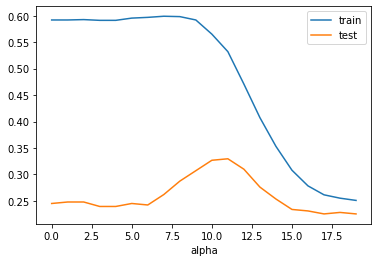

In [17]:
#inspect smoothing parameter
all_train_acc = []
all_test_acc = []
for a in np.logspace(-2,2,20):
  model = MultinomialNB(fit_prior=True,alpha=a)
  model.fit(X_train, y_train)


  train_acc = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
  test_acc = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))
  print ("alpha:", a, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
  
  all_train_acc.append(train_acc)
  all_test_acc.append(test_acc)

plt.figure()
plt.plot(all_train_acc)
plt.plot(all_test_acc)
plt.legend(['train','test'])
plt.xlabel('alpha')

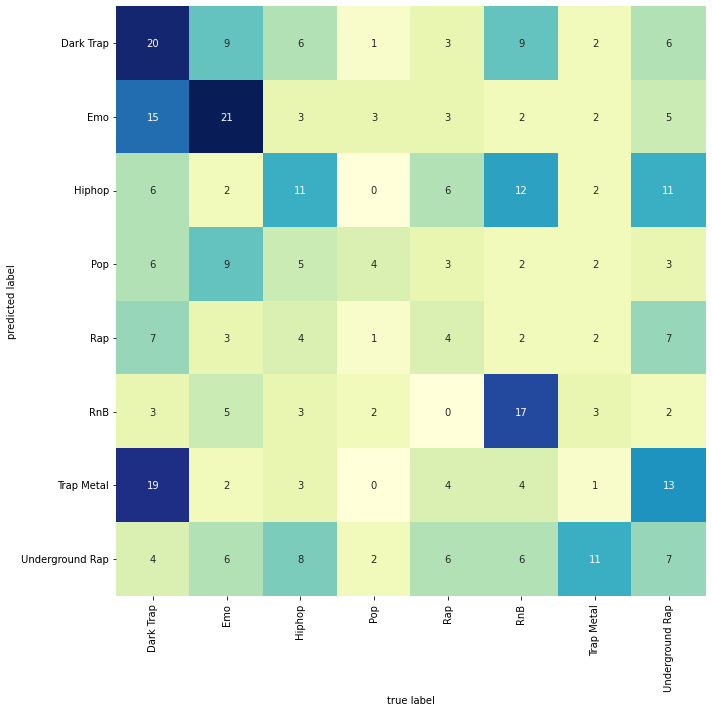

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

model = MultinomialNB(fit_prior=True,alpha=0.07)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.tight_layout()

alpha: 0.01  - Train F1: 0.5775388688577043  - Test F1: 0.2192767789259234
alpha: 0.016237767391887217  - Train F1: 0.5782306059631037  - Test F1: 0.2216643299182247
alpha: 0.026366508987303583  - Train F1: 0.5784330837784872  - Test F1: 0.2187268732396881
alpha: 0.04281332398719394  - Train F1: 0.5780570371089397  - Test F1: 0.21846950618680522
alpha: 0.06951927961775606  - Train F1: 0.5769756680523932  - Test F1: 0.22020182499570354
alpha: 0.11288378916846889  - Train F1: 0.5773643298261941  - Test F1: 0.2210283692509996
alpha: 0.18329807108324356  - Train F1: 0.5787518472604467  - Test F1: 0.22392929926304772
alpha: 0.29763514416313175  - Train F1: 0.5771551965134382  - Test F1: 0.22904010082897044
alpha: 0.4832930238571752  - Train F1: 0.5671188485331965  - Test F1: 0.23575018807689185
alpha: 0.7847599703514611  - Train F1: 0.5368205085778555  - Test F1: 0.22171720542465811
alpha: 1.2742749857031335  - Train F1: 0.461898338123552  - Test F1: 0.22992804735905714
alpha: 2.06913808111

Text(0.5, 0, 'alpha')

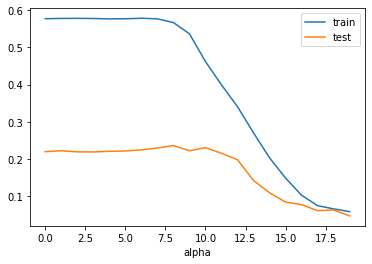

In [19]:
import sklearn
#inspect smoothing parameter
all_train_acc = []
all_test_acc = []
for a in np.logspace(-2,2,20):
  model = MultinomialNB(fit_prior=False,alpha=a)
  model.fit(X_train, y_train)


  train_acc = sklearn.metrics.f1_score(y_true=y_train, y_pred=model.predict(X_train),average='macro')
  test_acc = sklearn.metrics.f1_score(y_true=y_test, y_pred=model.predict(X_test),average='macro')
  print ("alpha:", a, " - Train F1:", train_acc, " - Test F1:", test_acc)
  
  all_train_acc.append(train_acc)
  all_test_acc.append(test_acc)

plt.figure()
plt.plot(all_train_acc)
plt.plot(all_test_acc)
plt.legend(['train','test'])
plt.xlabel('alpha')